In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images',
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images', # same directory as training data
    target_size=(512, 512),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(512, 512, 3))

Found 5121 images belonging to 3 classes.
Found 1278 images belonging to 3 classes.


In [ ]:
from keras.applications import ResNet101V2

RESNET_101_V2 = Sequential()

resnet101v2_model = keras.applications.resnet_v2.ResNet101V2(
    include_top=False, weights='imagenet',
    input_shape=[512,512,3], pooling='max', classes=3,
    classifier_activation='softmax'
)

In [ ]:
for layer in resnet101v2_model.layers:
    layer.trainable = False
    
RESNET_101_V2.add(resnet101v2_model)
RESNET_101_V2.add(Flatten())
RESNET_101_V2.add(Dense(512,activation='relu'))
RESNET_101_V2.add(Dense(3, activation='softmax'))

RESNET_101_V2.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
RESNET_101_V2.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

graph = RESNET_101_V2.fit(train_generator, epochs=25, validation_data = validation_generator)

graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 43,677,187
Trainable params: 1,050,627
Non-trainable params: 42,626,560
_________________________________________________________________
Epoch 1/25
161/161 [==============================] - 2415s 15s/step - loss: 3.0111 - accuracy: 0.6924 - val_loss: 0.4856 - val_accuracy: 0.8036
Epoch 2/25
161/161 [==============================] - 2609s 16s/step - loss: 0.6653 - acc

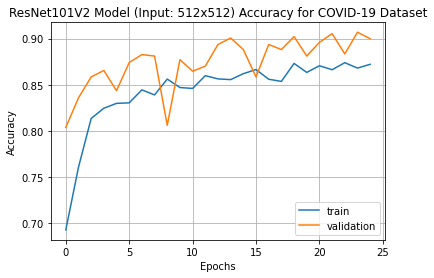

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('ResNet101V2 Model (Input: 512x512) Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using ResNet101V2 model with input size of 512x512 is',max_acc*100)

The highest accuracy achieved using ResNet101V2 model with input size of 512x512 is 90.68857431411743
